## Hierarchial Clustering

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset
data = pd.read_csv('environmental_socioeconomic.csv')
data.head()

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07


In [3]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(pd.DataFrame(data_scaled, columns=data.columns).head())

   co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475


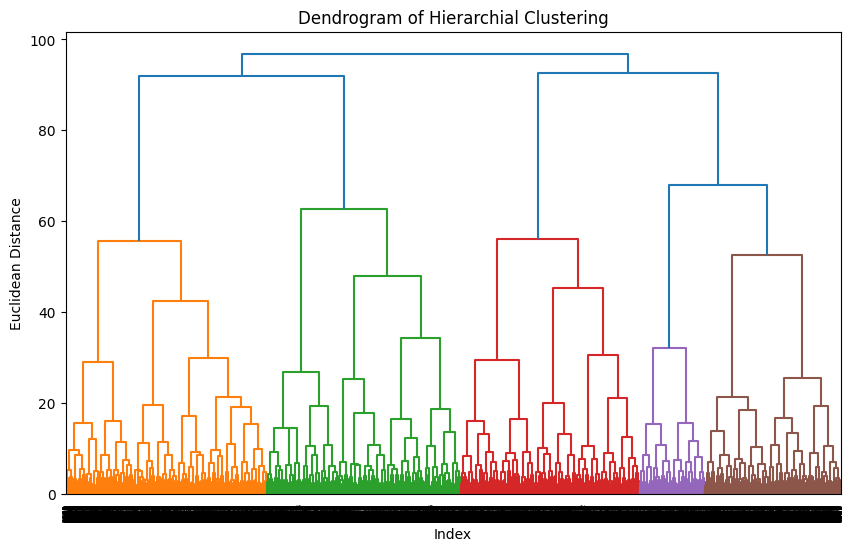

In [5]:
# Create a dendrogram to visualize the hierarchial clustering process
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.xlabel("Index")
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram of Hierarchial Clustering')
plt.show()

In [8]:
# Apply agglomerative Clustering assuming 7 clusters!
hierarchial_clustering = AgglomerativeClustering(n_clusters=7, linkage='ward')
data['cluster'] = hierarchial_clustering.fit_predict(data_scaled)
print(data.head())

   co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        0
1     477.821438        399.620887  17380.479824  4.646995e+07        3
2     379.397274        258.538521  23865.587775  9.648535e+07        3
3     319.396318        646.540003  36531.225474  2.267887e+07        2
4     120.208388        528.961744  29283.573781  5.919779e+07        5


In [9]:
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score is {sil_score}')

Silhouette Score is 0.11340626237860431


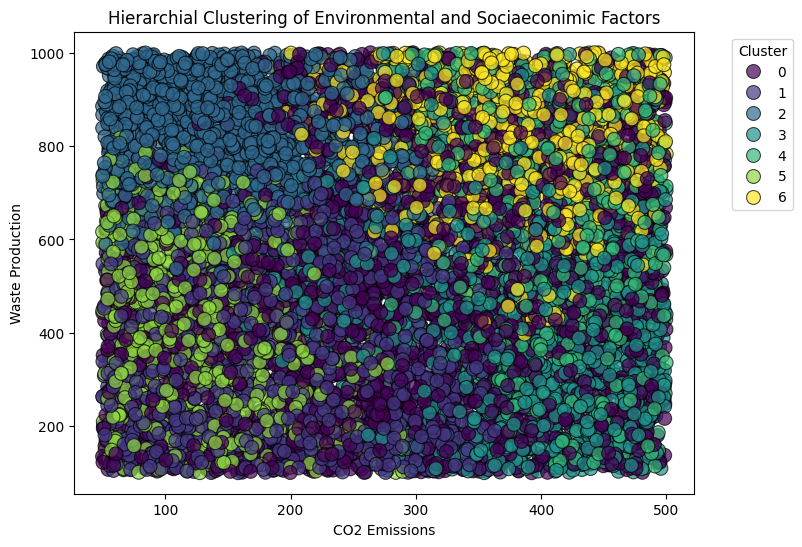

In [10]:
# Visualize using co2 emissions and waste production
plt.figure(figsize=(8,6))
sns.scatterplot(x='co2_emissions', y='waste_production', hue='cluster', data=data,
               palette='viridis', s=100, alpha=.7, edgecolor='k')
plt.title("Hierarchial Clustering of Environmental and Sociaeconimic Factors")
plt.xlabel('CO2 Emissions')
plt.ylabel('Waste Production')
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()